안녕하세요! 데이크루로 활동 중인 sssssun 입니다!

이번 포스팅은 저번에 이어서 데이터 시각화의 기능으로써 seaborn을 사용하는  방법에 대해 설명하려고 합니다.

저도 배우는 사람의 입장에서 포스팅을 작성하기 때문에, seaborn의 시각화 기능을 처음 접하는 사람이라도 쉽게 따라오실 수 있으실거에요!



seaborn으로 구현 가능한 다양한 그래프 개형들 중에 저번 포스팅에서 relation plots와 categorical plots 에 대해 설명했습니다.

이번 포스팅에서는 나머지 그래프들을 plotting해보겠습니다.

*   relation plots : 두 변수의 관계를 나타냄
##### 종류 : relplot, scatterplot, lineplot
*   categorical plots : 범주형 데이터를 대상으로 함
##### 종류 : catplot, stripplot, swarmplot, boxplot, violinplot, boxenplot, pointplot, barplot, countplot
*   distribution plots : 변수들의 분포를 나타냄
##### 종류 : hisplot, kdeplot, ecdfplot, rugplot, distplot	
*   regression plots : 회귀분석 결과를 나타내줌
##### 종류 : Implot, regplot, residplot
*   matrix plots : 변수 간의 관계 정도를 매트릭스로 만들고 색을 입혀 나타냄
##### 종류 : heatmap, clustermap
*   multi-plot grids : 여러 그래프를 한번에 나타냄
##### 종류 : FacetGrid, pairplot, PairGrid, jointplot, JointGrid

라이브러리를 import해주고, 필요한 dataset을 불러왔습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 1. histplot

먼저 distribution plots 을 차례로 플로팅해볼텐데요, 

histplot은 우리가 알고 있는 histogram과 같이 빈도수를 통한 변수의 분포를 나타내줍니다.


평균 0, 표준편차 1인 정규분포를 히스토그램으로 그려봅시다!

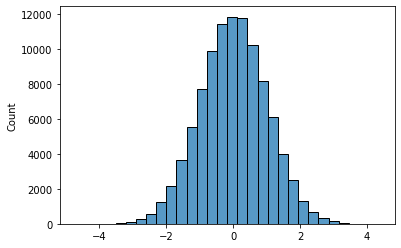

In [7]:
x = np.random.randn(100000)

sns.histplot(x=x, bins=30)
plt.show()

kde 매개변수를 True 로 설정해주면, 히스토그램 위에 선그래프를 그려줄 수 있습니다.

kde는 kdeplot에서 더 자세히 알 수 있을 거에요!

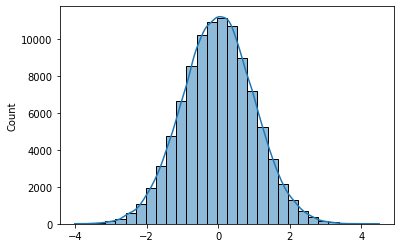

In [43]:
sns.histplot(x=x, bins=30, kde=True)
plt.show()

hue를 설정해서 범주별로 그래프를 그려줄 수도 있습니다.

penguins 데이터셋을 이용하여 종별로 부리의 길이를 히스토그램으로 나타내보았습니다.


매개변수 multiple 을 'stack'로 설정해주면, 쌓인 형태의 히스토그램이 출력됩니다.

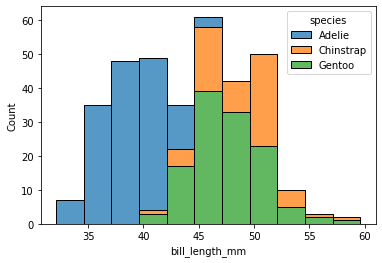

In [9]:
sns.histplot(data=penguins, x="bill_length_mm", hue="species", multiple='stack')
plt.show()

매개변수 multiple에 'dodge'로 지정해주면, 병렬적인 형태의 히스토그램을 출력할 수 있습니다! 범주별로 범위에 따른 빈도수를 비교하기에는 제일 좋은 것 같아요.

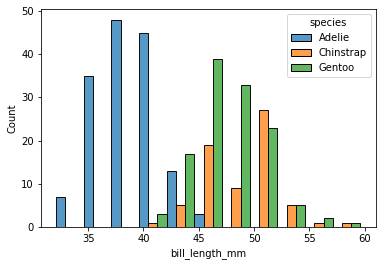

In [8]:
sns.histplot(data=penguins, x="bill_length_mm", hue="species", multiple='dodge')
plt.show()

multiple을 설정해주지 않으면, 겹쳐진 형태(overlay)의 그래프로 출력된답니다!

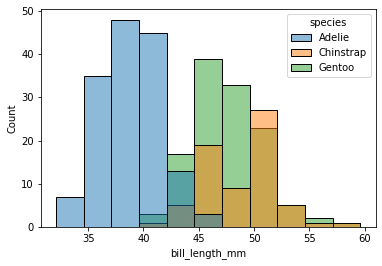

In [10]:
sns.histplot(data=penguins, x="bill_length_mm", hue="species")
plt.show()

histplot 은 x와 y, 두가지 변수를 모두 설정해줌으로써 2차원 평면 형태의 그래프를 그릴 수도 있습니다! 

iris data set의 꽃받침과 꽃잎의 길이 사이의 연관성을 평면 히스토그램으로 표현해봤어요. 다만, 다른 그래프에 비해 다소 직관성은 떨어지는 것 같습니다 ..!

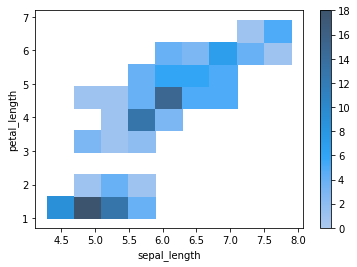

In [14]:
sns.histplot(data=iris, x='sepal_length', y='petal_length', cbar=True) #cbar는 colorbar를 의미합니다.
plt.show()

# 2. kdeplot

kdeplot 은 커널 밀도 추정(kernal density estimation) 그래프인데 변수의 데이터값을 상대적인 비율, 즉 밀도로 나타내기 때문에 연속된 곡선의 그래프로 나타내줍니다.


먼저 정규 분포 그래프를 그려볼까요?

평균 0, 표준편차 1의 그래프와 평균 5, 표준편차 2의 그래프를 그려보았습니다.

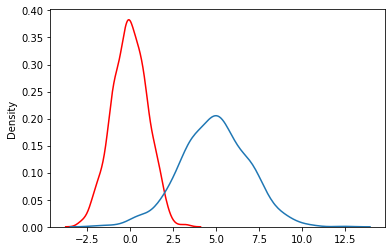

In [15]:
x = np.random.normal(0,1,1000)
y = np.random.normal(5,2,1000)

sns.kdeplot(x=x, color='red')
sns.kdeplot(x=y)
plt.show()

위에서 histogram으로 그렸던 펭귄의 종에 따른 부리의 길이를 kdeplot 으로도 출력해보았습니다.

종별로 분포를 쉽게 알 수 있네요!

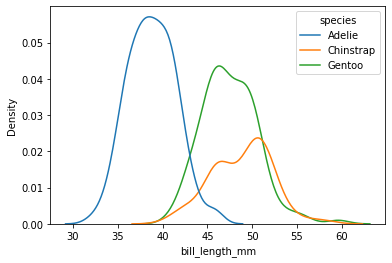

In [42]:
sns.kdeplot(data=penguins, x="bill_length_mm", hue="species")
plt.show()

histogram과 마찬가지로, 두가지 변수(x, y)를 지정해주면, 2차원의 등고선의 형태의 그래프를 출력할 수 있습니다.

펭귄의 부리와 두께를 각각 가로, 세로축의 변수로 지정해주었어요.

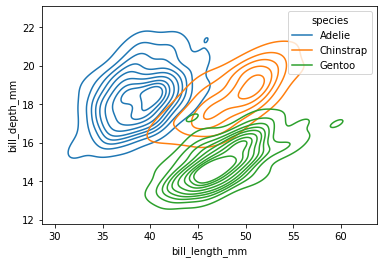

In [29]:
sns.kdeplot(data=penguins, x="bill_length_mm", y='bill_depth_mm', hue="species")
plt.show()

앞의 코드에서 보여드렸듯이, histogram을 그릴 때 매개변수 kde를 True로 설정하면 막대그래프 위에 선 그래프를 그릴 수 있으니 참고하시길 바랍니다.

displot, ecdfplot, rugplot, distplot

# 3. ecdfplot

ecdfplot은 경험적 누적 분포 함수(cumulative distribution function) 그래프를 출력해줍니다.

모든 데이터값을 볼 수 있고 데이터의 대략적인 분포를 알 수 있죠.

아래는 익숙한 정규분포의 cdf를 그려보았습니다.

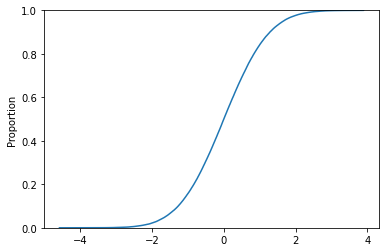

In [18]:
x = np.random.randn(100000)

sns.ecdfplot(x=x)
plt.show()

penguins 데이터셋을 활용해 종별로 나누어 부리의 길이를 나타내보니, 범주별로 전체적인 데이터를 비교하기에도 유용한 것 같습니다.

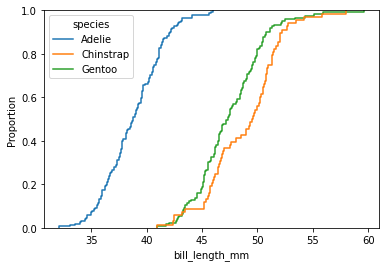

In [16]:
sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species")
plt.show()

# 4. rugplot

rugplot 은 실수 분포 그래프로, 실제 데이터 값을 가로축에 작은 선분으로 표현해줍니다.

보통 단독으로 쓰이기보다는, kde 같이 rug=True의 형태로 다른 그래프와 함께 사용됩니다.

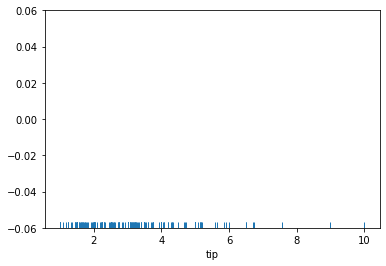

In [20]:
sns.rugplot(data=tips, x='tip')
plt.show()

tips data set 의 tip 변수를 나타내보았습니다!

세로축 값은 전혀 의미가 없고, 가로축에 데이터값이 표시가 됩니다.

하지만 .. 뭔가 효과적이지 못한 그래프로 느껴집니다. 따라서 보통은 다른 그래프와 함께 사용하는데, 저는 kdeplot 과 함께 사용해보았습니다.

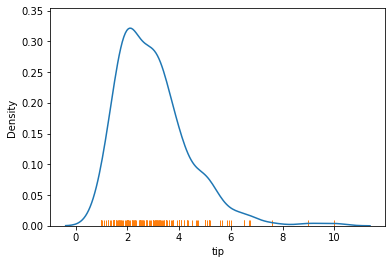

In [23]:
sns.kdeplot(data=tips, x='tip')
sns.rugplot(data=tips, x='tip')
plt.show()

이렇게 hue 를 사용하여 범주별로 표현할 수도 있습니다.

효과적이지는 않지만, 어느 범위에 특정 범주의 데이터 값이 모여있는지 확인할 수 있네요.

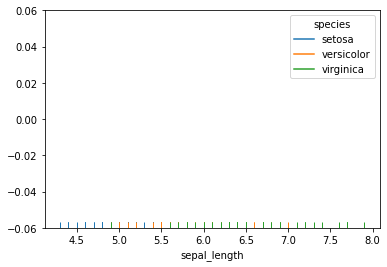

In [20]:
sns.rugplot(data=iris, x="sepal_length", hue="species")
plt.show()

# 5. displot

displot은 catplot 과 relplot 과 같이, distribution plots에 대해여 col을 설정하면 범주별로 여러개의 그래프를 한번에 나타낼 수 있습니다. 

displot은 histogram을 기본형으로 하고, kind를 통해 그래프 개형을 지정해줄 수 있습니다.

또한 kde와 rug 매개변수를 활용하여 필요에 따라 여러 그래프 개형을 한번에 표현할 수도 있기 때문에 제일 자주 사용된다고 합니다.

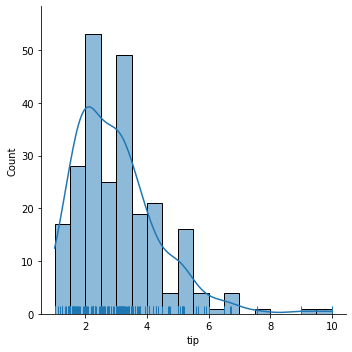

In [38]:
sns.displot(x=tips.tip, kde=True, rug=True)
plt.show()

위의 그래프와 같이, 여러개의 그래프가 중첩되어 원래는 최소 2-3줄의 코드가 필요한 그래프도 한번에 그릴 수 있습니다.

tips data set 에 대하여 요일별로 팁을 나타내보았습니다.


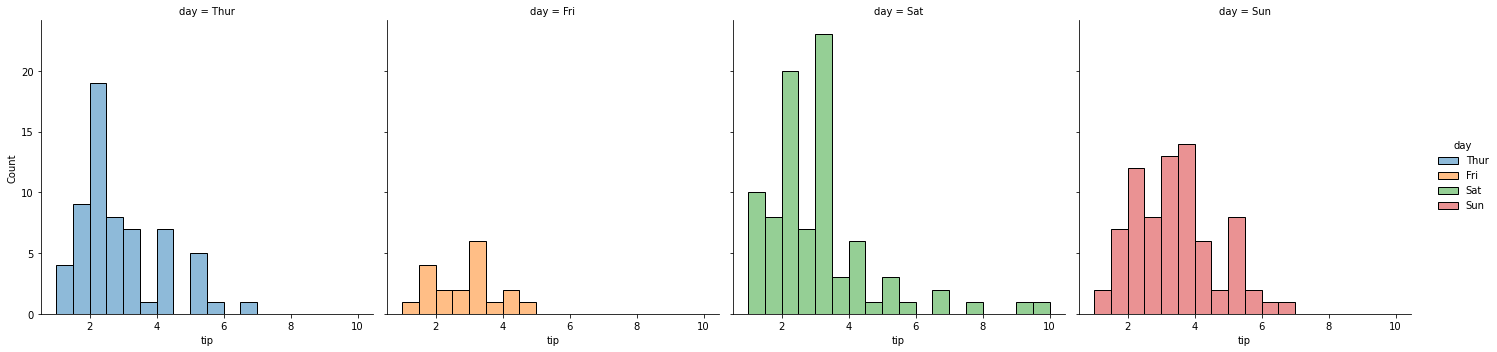

In [48]:
sns.displot(data=tips, x='tip', col='day', hue='day')
plt.show()

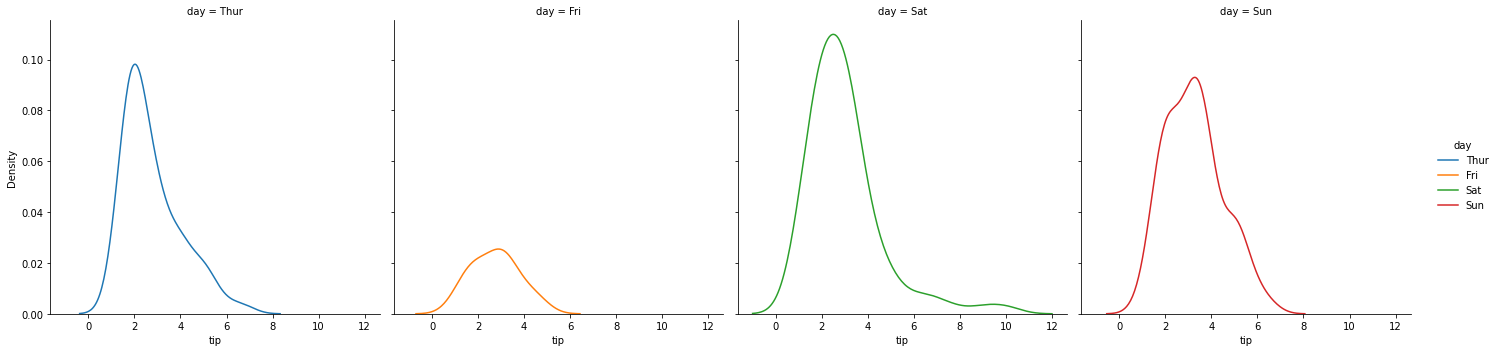

In [45]:
sns.displot(data=tips, kind='kde', x='tip', col='day', hue='day')
plt.show()

다음은 regression plots를 그려보겠습니다.

regression plots 는 데이터값을 회귀분석한 결과를 그래프로 나타내줍니다. 

scatter plot 과 회귀선을 나타내주는 개형을 띄고 있습니다.

# 6. regplot

regplot은 scatterplot과 회귀선을 함께 나타내줍니다.

x와 y, 즉 가로축, 세로축 두가지 변수를 지정해주면, 변수간의 regression 결과를 나타내주는 것입니다.

간단하게 tips data set 으로 알아볼까요?

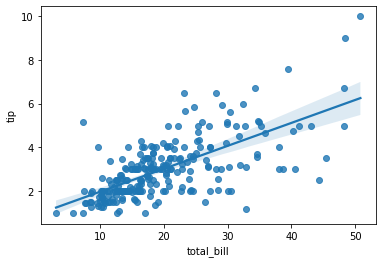

In [53]:
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

대체적으로 총 금액이 증가함에 따라, 팁도 증가하는 경향을 예측해볼 수 있네요!

회귀선 주변의 음영은 신뢰구간을 나타내는데, 신뢰구간을 지우고 싶다면 ci=None 을 추가해주면 됩니다!

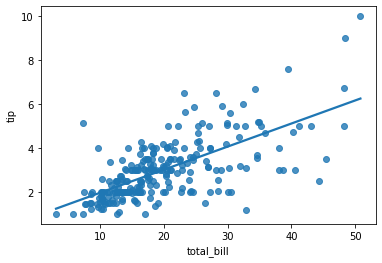

In [54]:
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.show()

음영 없이 선만 표현되었죠?

하지만 regplot은 hue 와 같은 매개변수를 이용하여 범주별로 데이터 값과 회귀선을 한번에 나타낼 수 없다는 단점이 있습니다. 

이는 바로 lmplot으로 보완이 가능합니다!

# 7. lmplot

lmplot은 regplot 과 같은 기능을 가지나, catplot, relplot 과 같이 매개변수 col을 통해 여러개의 그래프를 한번에 그릴 수 있습니다.

또한 한번에 한가지의 변수만 대상으로 그래프를 그릴 수 있었던 regplot과 달리 hue 매개변수를 설정하여 범주별로 회귀선을 표현하는 것도 가능합니다!

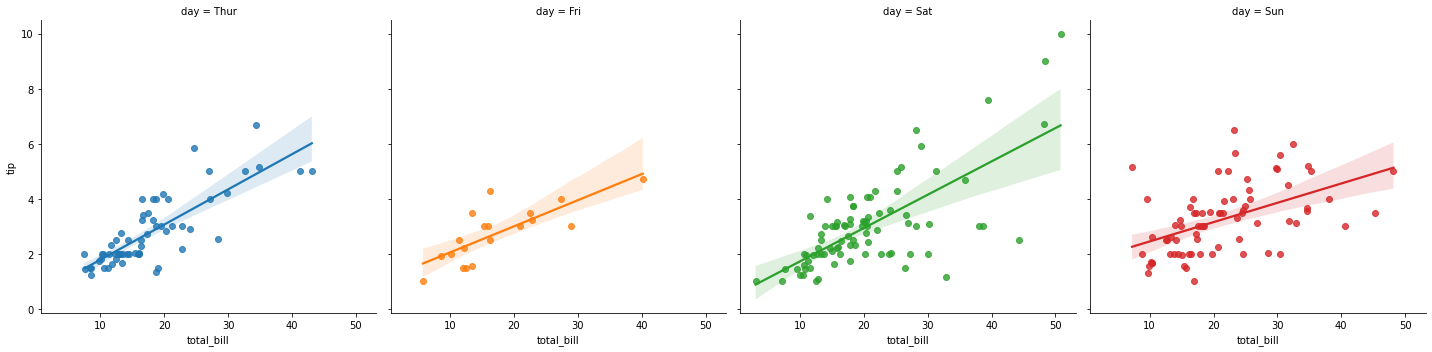

In [56]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='day', col='day')
plt.show()

점심과 저녁 시간의 총 금액 대비 tip 금액의 경향성을 한 그래프에 그려볼까요?

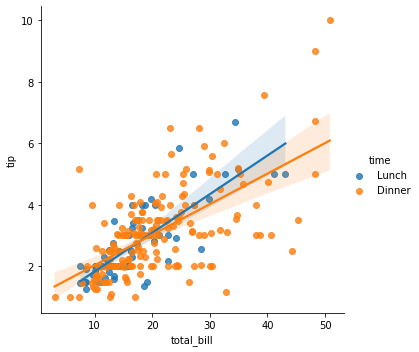

In [57]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='time')
plt.show()

# 8. residplot

residplot은 회귀선의 잔차, 즉 회귀선으로부터 데이터들의 오차값을 나타낸 그래프입니다.

즉, y축의 0 값의 선을 회귀선으로 놓고, scatter plot으로 나타난 데이터값들은 오차값을 나타냅니다.

이번에도 앞서 이용한 tips data를 이용하겠습니다.

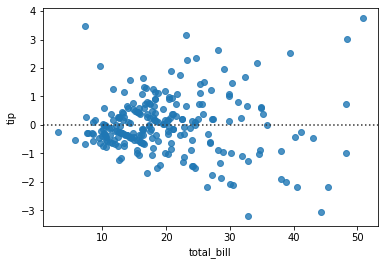

In [61]:
sns.residplot(data=tips, x='total_bill', y='tip')
plt.show()

총 금액이 많아질수록 tip 금액에서 차이가 커지는 것 같네요.

이번 포스팅에서는 전체적인 데이터값들의 분포와 도수, 밀도를 나타낼 수 있는 distribution plots 와, 회귀분석의 결과를 함께 나타내주는 regression plots를 플로팅하는 법을 설명했습니다!

다음 포스팅에서는 남은 seaborn의 그래프들을 출력해보겠습니다!

읽어주셔서 감사합니다^^!